Essay Type Analysis 

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print('nltk version:', nltk.__version__)
!python --version

nltk version: 3.7
Python 3.8.15


Load Data 

In [ ]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
data = pd.read_csv("data_subset_100.csv") 

Clean Data 

In [ ]:
data.isnull().sum()

LetterEssay    0
Text           0
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)

# term frequency (tf)
# inverse document frequency (idf)

X_tfidf = tfidf_vect.fit_transform(data['Text'].astype('U').values)

# columns = tfidf_vect.get_feature_names_out()
X_features = pd.DataFrame(X_tfidf.toarray())
X_features.head()

,0,1,2,3,4,5,6,7,8,9,...,2231,2232,2233,2234,2235,2236,2237,2238,2239,2240
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.043193,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.074930,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.064872,0.0
4,0.0,0.0,0.0,0.0,0.097437,0.044894,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [ ]:
data['LetterEssay'].head()

0    Letter
1    Letter
2    Letter
3    Letter
4    Letter
Name: LetterEssay, dtype: object

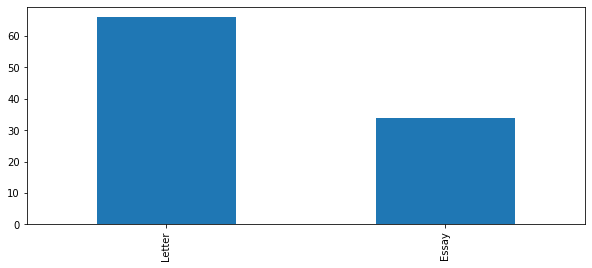

In [ ]:
# View the balance of labels in your dataset

plt.figure(figsize=(10,4))

data.LetterEssay.value_counts().plot(kind='bar');

Split the dataset into train/test

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [ ]:
# label = level
X_train, X_test, y_train, y_test = train_test_split(X_features, data['LetterEssay'], test_size=0.2)

Logistic Regressions Model

In [ ]:
from sklearn.linear_model import LogisticRegression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
import warnings
warnings.filterwarnings("ignore")

lr = LogisticRegression()
lr_model = lr.fit(X_train, y_train)

In [ ]:
y_pred = lr_model.predict(X_test)

Evaluate the model

In [ ]:
precision, recall, fscore, support = score(y_test, y_pred, average='weighted')

print('Accuracy: {} / Precision: {} / Recall: {} / F1 Score: {}'.format(round((y_pred==y_test).sum() / len(y_pred),3),
                                                            round(precision, 3),
                                                            round(recall, 3),
                                                            round(fscore, 3)))

Accuracy: 0.65 / Precision: 0.423 / Recall: 0.65 / F1 Score: 0.512


Details Metrics

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 0,  7],
       [ 0, 13]])

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Letter','Essay']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Letter       0.00      0.00      0.00         7
       Essay       0.65      1.00      0.79        13

    accuracy                           0.65        20
   macro avg       0.33      0.50      0.39        20
weighted avg       0.42      0.65      0.51        20



Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import warnings
warnings.filterwarnings("ignore")

rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
precision, recall, fscore, support = score(y_test, y_pred, average='weighted')

print('Accuracy: {} / Precision: {} / Recall: {} / F1 Score: {}'.format(round((y_pred==y_test).sum() / len(y_pred),3),
                                                            round(precision, 3),
                                                            round(recall, 3),
                                                            round(fscore, 3)))

Accuracy: 0.7 / Precision: 0.795 / Recall: 0.7 / F1 Score: 0.616


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 1,  6],
       [ 0, 13]])

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Letter','Essay']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Letter       1.00      0.14      0.25         7
       Essay       0.68      1.00      0.81        13

    accuracy                           0.70        20
   macro avg       0.84      0.57      0.53        20
weighted avg       0.79      0.70      0.62        20



Multinomial Model 

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
import warnings
warnings.filterwarnings("ignore")

mnb = MultinomialNB()
mnb_model = mnb.fit(X_train, y_train)

In [ ]:
y_pred = mnb_model.predict(X_test)

In [ ]:
precision, recall, fscore, support = score(y_test, y_pred, average='weighted')

print('Accuracy: {} / Precision: {} / Recall: {} / F1 Score: {}'.format(round((y_pred==y_test).sum() / len(y_pred),3),
                                                            round(precision, 3),
                                                            round(recall, 3),
                                                            round(fscore, 3)))

Accuracy: 0.65 / Precision: 0.423 / Recall: 0.65 / F1 Score: 0.512


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 0,  7],
       [ 0, 13]])

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Letter','Essay']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Letter       0.00      0.00      0.00         7
       Essay       0.65      1.00      0.79        13

    accuracy                           0.65        20
   macro avg       0.33      0.50      0.39        20
weighted avg       0.42      0.65      0.51        20



Hyperparamter Tuning

In [ ]:
RandomForestClassifier().get_params()
## most important = max_depth, n_estimators

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf = RandomForestClassifier(n_estimators=10, max_depth=10, n_jobs=-1, random_state = 42)
rf_model = rf.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

target_names = ['Letter','Essay']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Letter       0.71      0.71      0.71         7
       Essay       0.85      0.85      0.85        13

    accuracy                           0.80        20
   macro avg       0.78      0.78      0.78        20
weighted avg       0.80      0.80      0.80        20



Grid Search Cross Validation

In [ ]:
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1, random_state = 42)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, average='weighted')
    print('Est: {} / Depth: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        n_est, depth, round(precision, 3), round(recall, 3),
        round((y_pred==y_test).sum() / len(y_pred), 3)))

In [ ]:
for n_est in [10, 50, 100]:
    for depth in [10, 20, None]:
        train_RF(n_est, depth)

Est: 10 / Depth: 10 ---- Precision: 0.8 / Recall: 0.8 / Accuracy: 0.8
Est: 10 / Depth: 20 ---- Precision: 0.9 / Recall: 0.9 / Accuracy: 0.9
Est: 10 / Depth: None ---- Precision: 0.9 / Recall: 0.9 / Accuracy: 0.9
Est: 50 / Depth: 10 ---- Precision: 0.795 / Recall: 0.7 / Accuracy: 0.7
Est: 50 / Depth: 20 ---- Precision: 0.847 / Recall: 0.8 / Accuracy: 0.8
Est: 50 / Depth: None ---- Precision: 0.847 / Recall: 0.8 / Accuracy: 0.8
Est: 100 / Depth: 10 ---- Precision: 0.795 / Recall: 0.7 / Accuracy: 0.7
Est: 100 / Depth: 20 ---- Precision: 0.819 / Recall: 0.75 / Accuracy: 0.75
Est: 100 / Depth: None ---- Precision: 0.819 / Recall: 0.75 / Accuracy: 0.75
